Demonstrating: Testing accuracy depends on which observations have been selected:

In [1]:
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
#reading the iris data
iris = load_iris()

#X is feature matrix and y is response vector
X = iris.data
y = iris.target

In [9]:
#train test split: 75-25 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

##
#By changing random state value, we change the observations which are assigned to training/test set.
#The accuracy score changes along with these changed observation. Hence, testing acc is also known as high variance estimate
#Hence, cross validation, which changes test and training data and compare the testing accuracy each place.
##

#classification accuracy when k = 5
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print metrics.accuracy_score(y_test, y_pred)

1.0


## K Folds Cross validation

Every observation is in testing set only once
vs train/test:
more accurate estimate of out-of-sample accuracy
data is used more efficiently, since every observation is used for training as well aas testing the model.

However, Train/test 
runs K times faster.
easier to analyse detailed results of testing process using ROC curves.

K=10 is generally recommended. Experimentally best.

For classification problems,it is recommended to use Startified sampling to create the folds. scikit-learn uses this by default.


In [11]:
#splitting 25 observation into 5 folds
from sklearn.cross_validation import KFold
kf = KFold(25, n_folds = 5, shuffle = False)

#print content of each training and testing set
print '{} {:^61} {}'.format('Iteration', 'Training set observations', 'Training set observations')
for iteration, data in enumerate(kf, start = 1):
    print '{:^9} {} {:^25}'.format(iteration, data[0], data[1])

Iteration                   Training set observations                   Training set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


## Using Cross validation for selecting parameters(kNN)
Selecting best tuning parameters for kNN model (selecting this k)

In [41]:
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier(n_neighbors = 5)
scores = cross_val_score(knn, X, y, cv = 10, scoring = 'accuracy') #cv = 10 implies that we are using 10 fold cross validaion. Classification 'accuracy' is used as evaluation metric. 
print scores

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]


In [15]:
#average accuracy as an estimate for out-of-sample accuracy
print scores.mean()

0.966666666667


In [26]:
#Searching for optimal value of k in kNN
k_range = range(1,31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, y, cv = 10, scoring = 'accuracy')
    k_scores.append(scores.mean())
print k_scores


[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


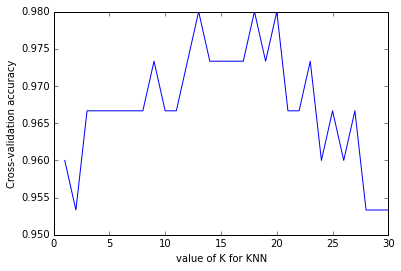

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, k_scores)
plt.xlabel('value of K for KNN')
plt.ylabel('Cross-validation accuracy')

##Using Cross Validation for model selection

In [28]:
knn = KNeighborsClassifier(n_neighbors=20)
scores = cross_val_score(knn, X, y, cv = 10, scoring = 'accuracy')
print scores.mean()

0.98


In [30]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
scores = cross_val_score(logreg, X, y, cv = 10, scoring = 'accuracy')
print scores.mean()

0.953333333333


##Using cross Validation for Feature selection

In [35]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [36]:
#We would be working on advertising dataset.
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col = 0)

In [43]:
feature_cols = ['TV', 'Radio', 'Newspaper']

X = data[feature_cols]
y = data.Sales


In [45]:
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv = 10, scoring = 'mean_squared_error')
print scores

[ 3.56038438  3.29767522  2.08943356  2.82474283  1.3027754   1.74163618
  8.17338214  2.11409746  3.04273109  2.45281793]


In [47]:
mse_score = -scores
print mse_score

[ 3.56038438  3.29767522  2.08943356  2.82474283  1.3027754   1.74163618
  8.17338214  2.11409746  3.04273109  2.45281793]


In [49]:
rmse_score = np.sqrt(mse_score)
print rmse_score
print rmse_score.mean()

[ 1.88689808  1.81595022  1.44548731  1.68069713  1.14139187  1.31971064
  2.85891276  1.45399362  1.7443426   1.56614748]
1.69135317081


In [51]:
#Cross val score for only two features:
feature_cols = ['TV', 'Radio']
X = data[feature_cols]

print np.sqrt(-cross_val_score(lm, X, y, cv = 10, scoring = 'mean_squared_error')).mean()

1.67967484191
